## CSR performance of US companies 2004 - 2018

In [1]:
# import libraries
import numpy as np
import pandas as pd


from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
import plotly.io as pio
from PIL import Image
import statsmodels.formula.api as smf
from scipy.stats.mstats import winsorize

import gc
%matplotlib widget
%matplotlib notebook
pio.templates.default = 'plotly_white'

In [2]:
### import the data
df = pd.read_csv("esg_cleaned.csv")
print(df.shape)
df.head(3)

(16158, 24)


,company,gvkey,year,ticker,sic,log_assets,log_sales,sales_growth,return,roa,...,ceo_female,compensation,log_totcomp,industry,Construction,Manufacturing,Transportation,Wholesale,Retail,Services
0,AAR CORP,1004,2004,AIR,50,6.597459,6.618536,0.147080,0.674322,0.021104,...,0.0,7045.048,8.860222,Wholesale,0,0,0,1,0,0
1,AAR CORP,1004,2005,AIR,50,6.887368,6.800486,0.199821,0.501247,0.035924,...,0.0,6568.409,8.790179,Wholesale,0,0,0,1,0,0
2,AAR CORP,1004,2006,AIR,50,6.974135,6.968068,0.182646,0.349668,0.054944,...,0.0,6787.100,8.822926,Wholesale,0,0,0,1,0,0


### CSR performance by year

**Get average performance over years**

In [3]:
# only select numeric columns to calculate the mean
# df.select_dtypes(include=np.number).groupby(['year']).mean()

# select certain columns to calculate the mean
vars_to_mean = ['log_assets', 'log_sales',
       'sales_growth', 'return', 'roa', 'csr_total', 'csr_external',
       'csr_internal', 'compensation', 'log_totcomp']

df_yr = df.groupby(['year'])[vars_to_mean].mean()
df_yr['year'] = df_yr.index
df_yr.shape


(15, 11)

#### Static line plot

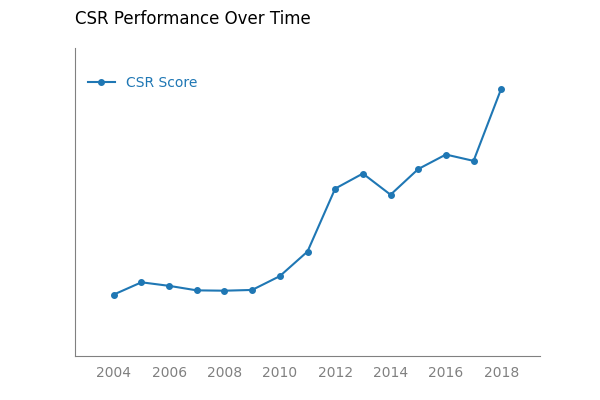

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
# plt.subplots_adjust(left=0.5, bottom=0.5, right=0.9, top=0.9)
ax.plot(df_yr.year, df_yr.csr_total, 'o-', markersize=4, label='CSR Score', color='#1f77b4')
ax.set_ylim(-1, 2.5)
ax.use_sticky_edges = False
ax.margins(0.1)
ax.set_title("CSR Performance Over Time", loc='left', y=1.05)
ax.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=True, color='grey', labelcolor="grey")
# or ax.set_ytick([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
for spine in ax.spines.values():
    spine.set_edgecolor('grey')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.95), fontsize = 'medium', frameon=False, labelcolor = 'linecolor')
plt.show()


#### Animated line plot

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))

line, = ax.plot(df_yr.year, df_yr.csr_total, '-', label='CSR Score', color='#1f77b4')
ax.set_ylim(-1, 2.5)
ax.set_xlim(2003, 2019) 
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.95), fontsize = 'medium', frameon=False, labelcolor = 'linecolor')
ax.use_sticky_edges = False
ax.margins(0.1)
ax.set_title("CSR Performance Over Time", loc='left', y=1.01, fontweight='bold', fontsize=12)
ax.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=True, color='grey', labelcolor="grey")
# or ax.set_ytick([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
for spine in ax.spines.values():
    spine.set_edgecolor('grey')


def animate_line(i):
    line.set_data(df_yr.year[:i],df_yr.csr_total[:i])
    return line,
    

anim_line = FuncAnimation(fig, animate_line, frames=len(df_yr.year)+1, interval=250, blit = False, repeat=False)

#### CSR performance by industry

#### Get average performance by industry over time

In [ ]:
vars_to_mean = ['log_assets', 'log_sales',
       'sales_growth', 'return', 'roa', 'csr_total', 'csr_external',
       'csr_internal', 'compensation', 'log_totcomp']

df_ind_yr = df.groupby(['year', 'industry'])[vars_to_mean].mean()
df_ind_yr=df_ind_yr.reset_index()
df_ind_yr.sort_values(['industry', 'year'])

In [ ]:
df_tr_yr= df_ind_yr[df_ind_yr['industry']=='Transportation'].reset_index(drop=True)
df_mf_yr= df_ind_yr[df_ind_yr['industry']=='Manufacturing'].reset_index(drop=True)
df_re_yr= df_ind_yr[df_ind_yr['industry']=='Retail'].reset_index(drop=True)
df_se_yr= df_ind_yr[df_ind_yr['industry']=='Services'].reset_index(drop=True)
df_co_yr= df_ind_yr[df_ind_yr['industry']=='Construction'].reset_index(drop=True)
df_ws_yr= df_ind_yr[df_ind_yr['industry']=='Wholesale'].reset_index(drop=True)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

fig.suptitle('CSR Performance of different industries Over Time', x=0.255, y=0.95, fontweight='bold', fontsize=12)

line1, = axes[0].plot([], [], '.-', color='#1f77b4', markersize=5, alpha=0.2, label='Transportation')
line2, = axes[0].plot([], [], '+-', color='#1f77b4', markersize=5, alpha=0.3, label='Manufacturing')
line3, = axes[0].plot([], [], '*-', color='#1f77b4', markersize=5, alpha=0.4, label='Services')
line4, = axes[1].plot([], [], '.-', color='#1f77b4', markersize=5, alpha=0.5, label='Retail')
line5, = axes[1].plot([], [], '+-', color='#1f77b4', markersize=5, alpha=0.6, label='Construction')
line6, = axes[1].plot([], [], '*-', color='#1f77b4', markersize=5, alpha=0.7, label='Wholesale')

for ax in axes:
    ax.set_ylim(-1.7, 2.5)
    ax.set_xlim(2003, 2019)
    ax.use_sticky_edges = False
    ax.margins(0.1)
    ax.text(2014, -1.5, 'CSR of all firms', color='grey', alpha=0.7, fontsize='medium')
    ax.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=True, color='grey', labelcolor="grey")
    # or ax.set_ytick([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_edgecolor('grey')
    # plt.subplots_adjust(left=0.5, bottom=0.5, right=0.9, top=0.9)
    ax.fill_between(df_yr.year, -1.8, df_yr.csr_total, facecolor='grey', 
                    edgecolor = 'none', alpha=0.15) # adjust the baseline to -1.8, the default is 0.
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.03), fontsize = 'medium', frameon=False, labelcolor = 'linecolor', title='CSR Score > Avg of all', alignment='left')
    ax.get_legend().get_title().set_color('grey')

def animate_multiple_line(i):
    line1.set_data(df_tr_yr.year[:i], df_tr_yr.csr_total[:i])
    line2.set_data(df_mf_yr.year[:i], df_mf_yr.csr_total[:i])
    line3.set_data(df_se_yr.year[:i], df_se_yr.csr_total[:i])
    line4.set_data(df_re_yr.year[:i], df_re_yr.csr_total[:i])
    line5.set_data(df_co_yr.year[:i], df_co_yr.csr_total[:i])
    line6.set_data(df_ws_yr.year[:i], df_ws_yr.csr_total[:i])

fig.tight_layout()
anim_multiple_line = FuncAnimation(fig, animate_multiple_line, frames=len(df_yr.year)+1, interval=250, blit = False, repeat=False)


### CSR performance by gender

In [ ]:
vars_to_mean = ['log_assets', 'log_sales',
       'sales_growth', 'return', 'roa', 'csr_total', 'csr_external',
       'csr_internal', 'compensation', 'log_totcomp']

df_gender_yr = df.groupby(['year', 'ceo_female'])[vars_to_mean].mean()
df_gender_yr=df_gender_yr.reset_index()
df_gender_yr.sort_values(['ceo_female', 'year'])

Dynamic bar chart

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4))

x = df_gender_yr['year'].unique()
x_axis = np.arange(len(x))
ym = df_gender_yr[df_gender_yr['ceo_female']==0.0].csr_total+0.5
yfe= df_gender_yr[df_gender_yr['ceo_female']==1.0].csr_total+0.5


def animate_bar(i):
    ax.cla()
    
    ax.set_xticks(x_axis)
    ax.set_xticklabels(x)
    ax.set_ylim(0, 3.2)
    ax.set_xlim(-1, 15)
    ax.set_title("CSR performance over time by gender", loc='left', y=1.01, fontweight='bold', fontsize=12)
    ax.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, 
                labelright=False, labelbottom=True, color='grey', labelcolor="grey", labelsize='small')
    # or ax.set_ytick([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_edgecolor('grey')

    ax.bar(x_axis - 0.2, ym, 0.4, color='#1f77b4', alpha=0.5, label = "Males")
    ax.bar(x_axis[:i] + 0.2, yfe[:i], 0.4, color='#1f77b4', alpha=0.9, label = "Females")
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.04), fontsize = 'medium', frameon=False, labelcolor = 'linecolor', title='CSR Score', alignment='left')
    ax.get_legend().get_title().set_color('grey')

anim_bar = FuncAnimation(fig, animate_bar, frames=len(x)+1, interval=250, blit = False, repeat=False)




### CSR performance and ROA scatter plot and Linear regression

In [ ]:
# winsorize data
threshold = 0.01
df['log_assets_w'] = winsorize(df['log_assets'].values, limits=threshold)
df['csr_total_w'] = winsorize(df['csr_total'].values, limits=threshold)
df['roa_w'] = winsorize(df['roa'].values, limits=threshold)
df_sca = df[['year', 'log_assets_w', 'roa_w', 'csr_total_w']]

Randomly select observations from each year to make scatter plots more readable

In [ ]:
df_sca_rand = df_sca.groupby('year').apply(lambda x: x.sample(100)).reset_index(drop=True)
df_sca_rand.shape

Run Linear regression of sales and csr by year and save the results

In [ ]:
years = df_sca['year'].unique().tolist()
ols_results = {'year':[], 'a':[], 'b':[]}
for year in years:
    ols = smf.ols(formula = ' csr_total_w ~ log_assets_w', data=df_sca[df_sca['year']==year]).fit()
    ols_results['year'].append(year)
    ols_results['a'].append(ols.params[0])
    ols_results['b'].append(ols.params[1])

ols_results = pd.DataFrame.from_dict(ols_results)
ols_results

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4), gridspec_kw={'width_ratios': [3, 2]})

# line and scatter plots
x_range = np.linspace(4.5, 11, 300)
ax1.set_xlim(4, 12)
ax1.set_ylim(-6, 11)
ax1.set_xlabel('Log Assets', color = 'grey')
ax1.set_ylabel('CSR  \nScore', rotation=0, color = 'grey')
ax1.yaxis.set_label_coords(-0.04, 0.90)
ax1.set_title("CSR performance and firm size", loc='left', y=1.01, fontweight='bold', fontsize=12)
ax1.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, 
            labelright=False, labelbottom=True, color='grey', labelcolor="grey", labelsize='small')
# or ax.set_ytick([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(True)
for spine in ax1.spines.values():
    spine.set_edgecolor('grey')

scat = ax1.scatter([], [], color='grey', marker='x', s=8, alpha=0.6)
line, = ax1.plot([], [], color='#1f77b4', linewidth=2, alpha=0.9)
text_line = ax1.text(5.5, 5.5, '', fontsize=12, fontweight='bold', color = '#1f77b4',
                    bbox=dict(facecolor='#1f77b4', edgecolor='#1f77b4', alpha=0.2, boxstyle='round, pad=1'))
text_year = ax1.text(4.1, 9.5, '', fontsize=12, fontweight='bold', color = '#1f77b4', alpha=0.5)

def animate_scat(i):
    x = df_sca_rand['log_assets_w'].loc[df_sca_rand['year']==years[i]]
    y = df_sca_rand['csr_total_w'].loc[df_sca_rand['year']==years[i]]
    coef = ols_results['b'].loc[ols_results['year']==years[i]].tolist()[0]
    con = ols_results['a'].loc[ols_results['year']==years[i]].tolist()[0]

    scat.set_offsets(pd.concat([x, y], axis=1).to_numpy())
    line.set_data(x_range, coef*x_range+con)
    text_line.set_text('CSR = {:.2f} + {:.2f}LogAssets'.format(con, coef))
    text_year.set_text('Year {}'.format(years[i]))


# Bar chart
ax2.barh(years[:6], ols_results['b'][:6], color = '#1f77b4', alpha = 0.5)
ax2.barh(years[6:], ols_results['b'][6:], color = '#1f77b4', alpha = 0.9)
ax2.set_xlabel('Coefficient of LogAssets', color = 'grey')
ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax2.invert_yaxis()
ax2.set_title('Coefficients of OLS regressions by year \nCSR = Intercept + Coef * LogAssets', loc='left', y=1.01, fontweight='bold', fontsize=10)
ax2.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=True, labeltop=False, 
            labelright=False, labelbottom=True, color='grey', labelcolor="grey", labelsize='small')
# or ax.set_ytick([])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('grey')


anim_scat = FuncAnimation(fig, animate_scat, frames=15, interval=250, blit = False, repeat=False)
fig.tight_layout()
plt.show()